In [37]:
import pandas as pd

In [38]:
df = pd.read_csv("catalog.csv")

df.head()

,Unnamed: 0,3.6,d_3.6,4.5,d_4.5,5.8,d_5.8,8,d_8,24,d_24,target,pred,P(CI),P(CII),P(Other)
0,0,10.32,0.003,10.17,0.003,10.07,0.005,10.03,0.008,-99.0,-99.0,6,2,0.0,0.000057,0.999943
1,1,11.62,0.003,11.60,0.004,11.55,0.016,11.56,0.035,-99.0,-99.0,6,2,0.0,0.000000,1.000000
2,2,13.38,0.007,13.28,0.011,13.27,0.050,13.78,0.155,-99.0,-99.0,6,2,0.0,0.000000,1.000000
3,3,12.52,0.005,12.52,0.006,12.40,0.030,12.41,0.053,-99.0,-99.0,6,2,0.0,0.000000,1.000000
4,4,13.71,0.009,13.66,0.013,13.60,0.069,13.67,0.148,-99.0,-99.0,6,2,0.0,0.000000,1.000000


We want to access original classifications, but to begin we will use the targets.
* 0: Class I -- YSO (0)
* 1: Class II -- YSO (0)
* 2: Galaxies -- EG (1)
* 3: AGNs -- EG (1) 
* 4: Shocks -- EG (1)
* 5: PAHs -- EG (1)
* 6: Stars -- Stars (2)

In [39]:
df_YSO = pd.merge_ordered(df[df["target"]==0],df[df["target"]==1])
df_YSO["target"] = 0
print(df_YSO.shape)

df_EG_1 = pd.merge_ordered(df[df["target"]==2],df[df["target"]==3])
df_EG_2 = pd.merge_ordered(df[df["target"]==4],df[df["target"]==5])
df_EG = pd.merge_ordered(df_EG_1,df_EG_2)
df_EG["target"] = 1 

df_Stars = df[df["target"]==6]
df_Stars["target"] = 2

df_1 = pd.merge_ordered(df_YSO,df_EG)
df_NEW = pd.merge_ordered(df_1,df_Stars)

(3073, 16)


/var/folders/qy/7yz8bmv96hx8rndql_rfdz_80000gn/T/ipykernel_52018/4168265763.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Stars["target"] = 2


In [40]:
df

,Unnamed: 0,3.6,d_3.6,4.5,d_4.5,5.8,d_5.8,8,d_8,24,d_24,target,pred,P(CI),P(CII),P(Other)
0,0,10.320,0.003,10.170,0.003,10.070,0.005,10.030,0.008,-99.000,-99.000,6,2,0.000000,0.000057,0.999943
1,1,11.620,0.003,11.600,0.004,11.550,0.016,11.560,0.035,-99.000,-99.000,6,2,0.000000,0.000000,1.000000
2,2,13.380,0.007,13.280,0.011,13.270,0.050,13.780,0.155,-99.000,-99.000,6,2,0.000000,0.000000,1.000000
3,3,12.520,0.005,12.520,0.006,12.400,0.030,12.410,0.053,-99.000,-99.000,6,2,0.000000,0.000000,1.000000
4,4,13.710,0.009,13.660,0.013,13.600,0.069,13.670,0.148,-99.000,-99.000,6,2,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26898,26898,13.826,0.014,13.782,0.020,13.634,0.104,13.645,0.184,-99.000,-99.000,6,2,0.000000,0.000001,0.999999
26899,26899,13.393,0.010,13.286,0.011,13.124,0.066,13.077,0.084,-99.000,-99.000,6,2,0.000001,0.000025,0.999974
26900,26900,14.150,0.015,13.905,0.022,13.084,0.076,10.324,0.014,8.323,0.095,2,2,0.000000,0.000000,1.000000
26901,26901,10.513,0.003,10.456,0.002,10.400,0.009,10.420,0.010,-99.000,-99.000,6,2,0.000000,0.000000,1.000000


In [41]:
df_NEW


,Unnamed: 0,3.6,d_3.6,4.5,d_4.5,5.8,d_5.8,8,d_8,24,d_24,target,pred,P(CI),P(CII),P(Other)
0,0,10.320,0.003,10.170,0.003,10.070,0.005,10.030,0.008,-99.000,-99.000,2,2,0.000000,0.000057,0.999943
1,1,11.620,0.003,11.600,0.004,11.550,0.016,11.560,0.035,-99.000,-99.000,2,2,0.000000,0.000000,1.000000
2,2,13.380,0.007,13.280,0.011,13.270,0.050,13.780,0.155,-99.000,-99.000,2,2,0.000000,0.000000,1.000000
3,3,12.520,0.005,12.520,0.006,12.400,0.030,12.410,0.053,-99.000,-99.000,2,2,0.000000,0.000000,1.000000
4,4,13.710,0.009,13.660,0.013,13.600,0.069,13.670,0.148,-99.000,-99.000,2,2,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26898,26898,13.826,0.014,13.782,0.020,13.634,0.104,13.645,0.184,-99.000,-99.000,2,2,0.000000,0.000001,0.999999
26899,26899,13.393,0.010,13.286,0.011,13.124,0.066,13.077,0.084,-99.000,-99.000,2,2,0.000001,0.000025,0.999974
26900,26900,14.150,0.015,13.905,0.022,13.084,0.076,10.324,0.014,8.323,0.095,1,2,0.000000,0.000000,1.000000
26901,26901,10.513,0.003,10.456,0.002,10.400,0.009,10.420,0.010,-99.000,-99.000,2,2,0.000000,0.000000,1.000000


In [47]:
Inputs = df_NEW[["3.6","d_3.6","4.5","d_4.5","5.8","d_5.8","8","d_8"]].values.astype(float)

Targets = df_NEW[["target"]].values.astype(float)

In [48]:
import numpy as np

np.save("Inputs_YSO_EG_Stars.npy",Inputs)
np.save("Targets_YSO_EG_Stars.npy",Targets)

In [10]:
df_NEW[["target"]].hist()

<bound method hist_frame of        target
0           2
1           2
2           2
3           2
4           2
...       ...
26898       2
26899       2
26900       1
26901       2
26902       2

[26903 rows x 1 columns]>

If we follow the values CM21 used for each class, we should be using:
* Training
    * 1472 YSOs (331 CI and 1141 CII)
    * 857 EG (231 Gals, 529 AGN, 27 PAHs 70 Shocks)
    * 1257 Stars
* Validation
    * 613 YSOs (82 CI and 531 CII)
    * 405 EG (104 Gals, 278 AGNs, 6 PAHs, 17 Shocks)
    * 4359 Stars

We will use the above input and compare to using 1000 of each class. There are a total of:
* 3073 YSOs
* 2034 EG
* 21 796 Stars


In [15]:
print(df_YSO.shape)
print(df_EG.shape)
print(df_Stars.shape)

(3073, 16)
(2034, 16)
(21796, 16)
613
405


Signature: shuffle(*arrays, random_state=None, n_samples=None)
Docstring:
Shuffle arrays or sparse matrices in a consistent way.

This is a convenience alias to ``resample(*arrays, replace=False)`` to do
random permutations of the collections.

Parameters
----------
*arrays : sequence of indexable data-structures
    Indexable data-structures can be arrays, lists, dataframes or scipy
    sparse matrices with consistent first dimension.

random_state : int, RandomState instance or None, default=None
    Determines random number generation for shuffling
    the data.
    Pass an int for reproducible results across multiple function calls.
    See :term:`Glossary <random_state>`.

n_samples : int, default=None
    Number of samples to generate. If left to None this is
    automatically set to the first dimension of the arrays.  It should
    not be larger than the length of arrays.

Returns
-------
shuffled_arrays : sequence of indexable data-structures
    Sequence of shuffled copies of 

(array([1472.,    0.,    0.,    0.,    0.,  857.,    0.,    0.,    0.,
        1257.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

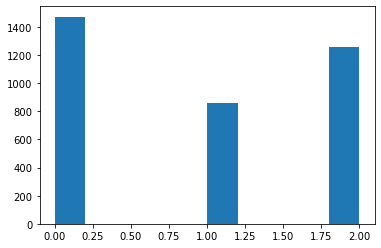

In [99]:
# import numpy as np
# ## Testing
# X = np.load("Inputs_YSO_EG_Stars.npy")
# Y = np.load("Targets_YSO_EG_Stars.npy")

# train_amount = [1472,857,1257]
# valid_amount = [613,405,4359]
# inp_tr, tar_tr, inp_va, tar_va, inp_te, tar_te = replicate_data(X, Y, train_amount, valid_amount)

# import matplotlib.pyplot as plt

# plt.hist(tar_tr)